In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
yellowC = '#f2ec83'
violetC = '#b685ba'
pinckC = '#FF9999'
darckGreenC = '#779945'
greenC = '#70bb03'


In [ ]:
novaseq = pd.read_csv('input/smpls_sets/NovaSeq_samples_set_2509.csv')
mgi = pd.read_csv('input/smpls_sets/MGI_samples_set_1729.csv')
final_set = pd.read_csv('input/smpls_sets/final_samples_set_1351.txt')  

### Reads number

In [18]:
path = '/Users/katerynapantiukh/Documents/1MyDisk/PhD/!MAIN_data/'

bgiNumb = pd.read_csv(str(path)+'cohort_info/ReadsNumb_BGI_fq1.csv', sep=' ')
bgiNumb['sample_name'] = bgiNumb['sample_id'].str.split('_').str[1]
bgiNumb['reads_number'] = bgiNumb['reads_number_fq1'] * 2
bgiNumb = bgiNumb[bgiNumb['sample_name'].isin(mgi['sample_name'])]

illNumb = pd.read_csv(str(path)+'cohort_info/ReadsNumb_illumina_fq1.csv', sep=' ')
illNumb['sample_name'] = illNumb['sample_id'].str.split('_').str[1]
illNumb['reads_number'] = illNumb['reads_number_fq1'] * 2

print('Number of samples in EstMB cohort is ', str(len(illNumb)))
print('Number of samples in EstMB-deep cohort is ', str(len(bgiNumb)),'\n')
print('Average number of reads in EstMB cohort is ', str(illNumb['reads_number'].mean().round(1)))
print('Sd number of reads in EstMB cohort is ', str(illNumb['reads_number'].std().round(1)),'\n')
print('Average number of reads in EstMB-deep cohort is ', str(bgiNumb['reads_number'].mean().round(1)))
print('Sd number of reads in EstMB-deep cohort is ', str(bgiNumb['reads_number'].std().round(1)),'\n')


bgiNumb['reads_number'].mean()/illNumb['reads_number'].mean()

Number of samples in EstMB cohort is  2509
Number of samples in EstMB-deep cohort is  1729 

Average number of reads in EstMB cohort is  30634426.4
Sd number of reads in EstMB cohort is  3120274.2 

Average number of reads in EstMB-deep cohort is  108714180.2
Sd number of reads in EstMB-deep cohort is  42083124.2 



3.5487584657734765

### Reads size

In [19]:
path = '/Users/katerynapantiukh/Documents/1MyDisk/PhD/!MAIN_data/'
# Illumina reads size
illRsize1 = pd.read_csv(str(path)+'cohort_info/reads_size_full_Illumina_fq1.csv', sep='\t')
illRsize2 = pd.read_csv(str(path)+'cohort_info/reads_size_full_Illumina_fq2.csv', sep='\t')
illRsize = illRsize1.merge(illRsize2, on='sample_id')
illRsize['sample'] = illRsize['sample_id'].str.split('_').str[1]
illRsize['reads_size'] = illRsize['rs_fq1'] + illRsize['rs_fq2']
illRsize = illRsize[['sample', 'reads_size', 'rs_fq1', 'rs_fq2']]

print('Number of Illumina samples is ', str(len(illRsize)))
#print('Mean size of Illumina reads files is ', str(illRsize["reads_size"].mean()), '+/-',str(illRsize["reads_size"].std()), 'kilobytes')
print('or ', str(illRsize["reads_size"].mean()*2/1048576)[0:5], '+/-',str(illRsize["reads_size"].std()/1048576)[0:5], 'Gb', '\n')

# BGI reads size
bgiRsize1 = pd.read_csv(str(path)+'cohort_info/reads_size_full_BGI_fq1.csv', sep='\t')
bgiRsize2 = pd.read_csv(str(path)+'cohort_info/reads_size_full_BGI_fq2.csv', sep='\t')
bgiRsize = bgiRsize1.merge(bgiRsize2, on='sample_id')
bgiRsize['sample'] = bgiRsize['sample_id'].str.split('_').str[1]
bgiRsize['reads_size'] = bgiRsize['rs_fq1'] + bgiRsize['rs_fq2']
bgiRsize = bgiRsize[['sample', 'reads_size', 'rs_fq1', 'rs_fq2']]

print('Number of BGI samples is ', str(len(bgiRsize)))
#print('Mean size of BGI reads files is ', str(bgiRsize["reads_size"].mean()), '+/-',str(bgiRsize["reads_size"].std()), 'kilobytes')
print('or ', str(bgiRsize["reads_size"].mean()/1048576)[0:5], '+/-',str(bgiRsize["reads_size"].std()/1048576)[0:5], 'Gb')



Number of Illumina samples is  2509
or  4.020 +/- 0.208 Gb 

Number of BGI samples is  2102
or  11.43 +/- 4.274 Gb


In [21]:
# read meta data
meta = pd.read_excel(str(path)+'pheno_description/EstMB_phenotype_data.xlsx', index_col=False)
metaC = meta[['gender', 'Age_at_MBsample', 'BMI','skood']]
# read match file
mtch = pd.read_excel(str(path)+'pheno_description/MB_scode_vcode.xlsx')
mtch = mtch[['skood', 'vkood']]
metaC = metaC.merge(mtch, on='skood', how='inner')
len(metaC)


2510

In [22]:
# selected smpls
metaMGI = metaC.merge(mgi, left_on='vkood', right_on='sample_name', how='inner')
metaFinSet = metaC.merge(final_set, left_on='vkood', right_on='sample_name', how='inner')
print('Number of selected samples is ', str(len(metaMGI)))
print('Number of selected samples in final set is ', str(len(metaFinSet)),'\n')

Number of selected samples is  1729
Number of selected samples in final set is  1351 



## Text Chapter 1. 
#### 1.1. Cohort overview and study design

In [25]:
# smpls
print('Number of analysed samples:', len(metaFinSet), '\n')

# meta
fem = len(metaFinSet[metaFinSet['gender'] == 1])
men = len(metaFinSet[metaFinSet['gender'] == 0])
print('Females: ', fem, ', ', str(fem/len(metaFinSet)*100)[0:5], '%')
print('Males: ', men, ', ', str(men/len(metaFinSet)*100)[0:5], '% \n')
print('Min age: ', metaFinSet['Age_at_MBsample'].min())
print('Mean age: ', metaFinSet['Age_at_MBsample'].mean().round(2))
print('Max age: ', metaFinSet['Age_at_MBsample'].max(), '\n')

Number of analysed samples: 1351 

Females:  971 ,  71.87 %
Males:  380 ,  28.12 % 

Min age:  23.0
Mean age:  49.69
Max age:  89.0 



### Figure 1. Workflow for MAG Reconstruction and Species-Level Clustering 

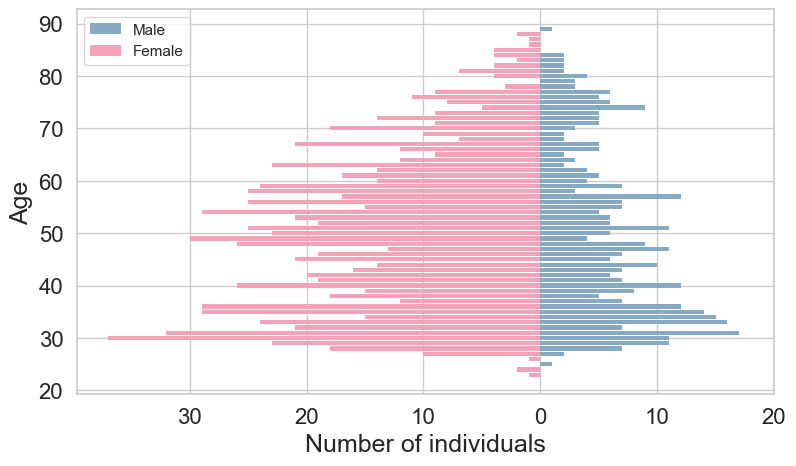

In [28]:
sns.set(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = metaFinSet.groupby(['gender', 'Age_at_MBsample']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index()

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.Age_at_MBsample, age_counts[0], label='Male', color='#85aac1', alpha=1, linewidth=0.01)
ax.barh(age_counts.Age_at_MBsample, -age_counts[1], label='Female', color='#f3a2b7', alpha=1,linewidth=0.01)

ax.set_xlabel('Number of individuals', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
#ax.set_title('Age Distribution Pyramid for Males and Females', fontsize=18)
ax.legend()
# custom ticks label 10, 0, 10 at the x-axis -10, 0, 10
ax.set_xticks([-30, -20, -10, 0, 10, 20])
ax.set_xticklabels(['30','20','10', '0', '10', '20'], fontsize=16)
plt.tick_params(labelsize=16)

plt.savefig('results/Figure_1/Fig1b_Pyramid.svg', bbox_inches='tight')
plt.savefig('results/Figure_1/Fig1b_Pyramid.png', bbox_inches='tight')

plt.show()

Panel C. Reads number

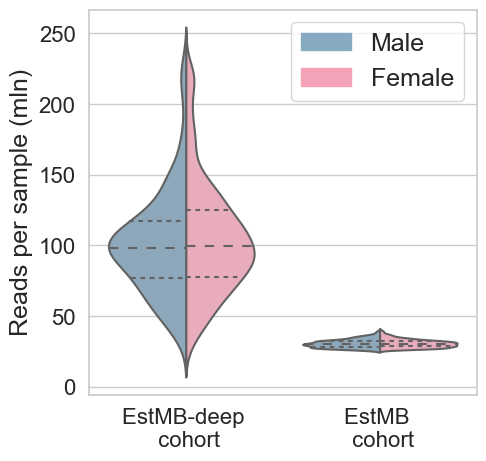

In [29]:
# Pic 1b
Rsize = pd.merge(bgiNumb, illNumb, on='sample_name', how='outer', suffixes=('_BGI', '_Ill'))
Rsize = Rsize.merge(metaFinSet, left_on='sample_name', right_on='vkood', how='right')
pic2 = pd.concat([
    Rsize[['reads_number_BGI', 'gender']].rename(columns={'reads_number_BGI': 'reads_size'}).assign(platform='BGI'),
    Rsize[['reads_number_Ill', 'gender']].rename(columns={'reads_number_Ill': 'reads_size'}).assign(platform='Illumina')
], axis=0, ignore_index=True)


# Set style
sns.set(style="whitegrid")

# Convert reads_size to millions
pic2['reads_size_million'] = pic2['reads_size'] / 1_000_000

# Create the violin plot
plt.figure(figsize=(5, 5))
sns.violinplot(x="platform", y="reads_size_million", hue="gender", data=pic2, split=True, 
               inner="quartile", palette={1: '#f3a2b7', 0: '#85aac1'})
plt.tick_params(labelsize=16)
# Labels and title
plt.xlabel("", fontsize=14)
plt.xticks([0, 1], ['EstMB-deep \n cohort', 'EstMB \n cohort'], fontsize=16)
plt.ylabel("Reads per sample (mln)", fontsize=18)
from matplotlib.patches import Patch
legend_handles = [
    Patch(color="#85aac1", label="Male"),  # Male color square
    Patch(color="#f3a2b7", label="Female")  # Female color square
]

plt.legend(handles=legend_handles,  fontsize=18)

plt.savefig('results/Figure_1/Fig1c_ReadsNumb.svg', bbox_inches='tight')
plt.savefig('results/Figure_1/Fig1c_ReadsNumb.png', bbox_inches='tight')
# Show the plot
plt.show()

